## Exploratory Data Analysis(EDA)

#### Loading required libraries

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(
    style="whitegrid",
    palette="viridis",
    font_scale=1.1
)

#### Load the cleaned datasets

In [13]:
df = pd.read_csv("dataset/aadhaar_cleaned_dataset.csv")
state_df = pd.read_csv("dataset/aadhaar_state_level_summary.csv")
district_df = pd.read_csv("dataset/aadhaar_district_level_summary.csv")

df['date'] = pd.to_datetime(df['date'])

#### Total Aadhaar Enrolments per District

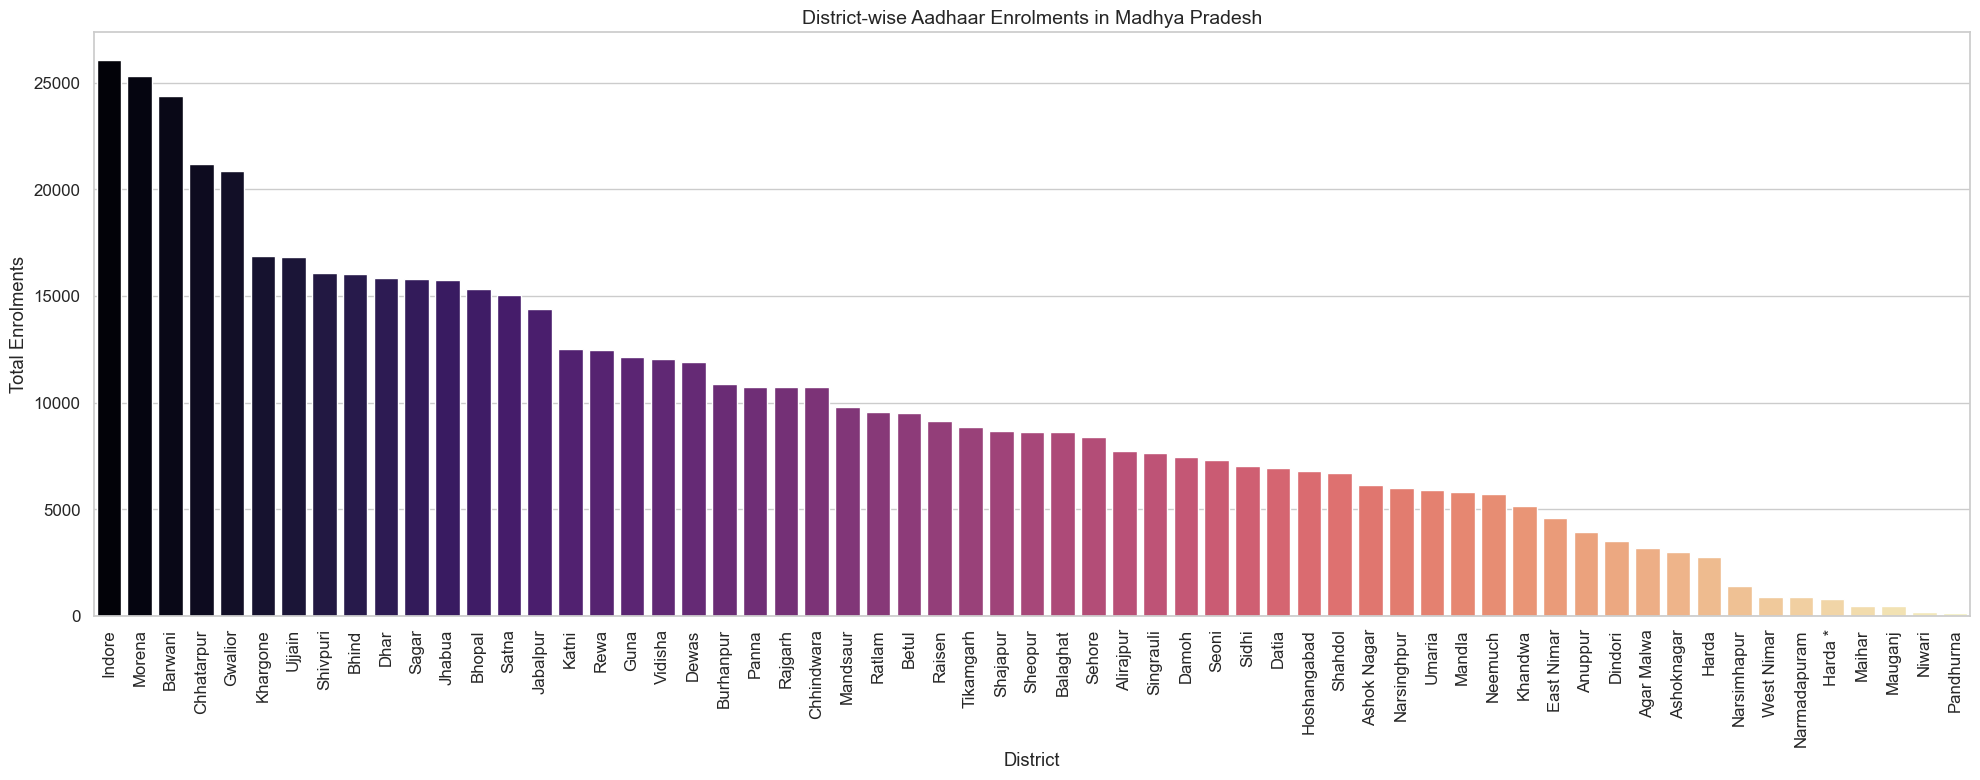

In [20]:
district_sorted = district_df.sort_values(
    'total_enrolments', ascending=False
)
plt.figure(figsize=(20, 8))
sns.barplot(
    data=district_sorted,
    x='district',
    y='total_enrolments',
    palette="magma"
)
plt.xticks(rotation=90)
plt.title("District-wise Aadhaar Enrolments in Madhya Pradesh", fontsize=14)
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()

#### How Aadhaar Enrolments Are Spread Across Districts

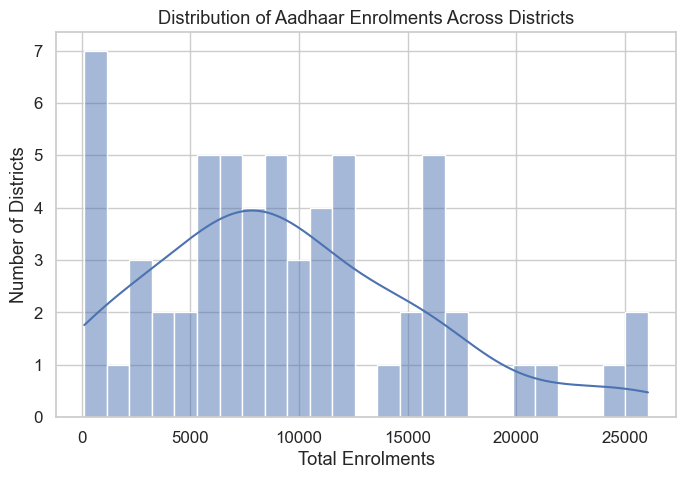

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(
    district_df['total_enrolments'],
    bins=25,
    kde=True,
    color="#4C72B0"
)

plt.title("Distribution of Aadhaar Enrolments Across Districts")
plt.xlabel("Total Enrolments")
plt.ylabel("Number of Districts")
plt.show()


#### Age-wise Aadhaar Enrolments (Overall)

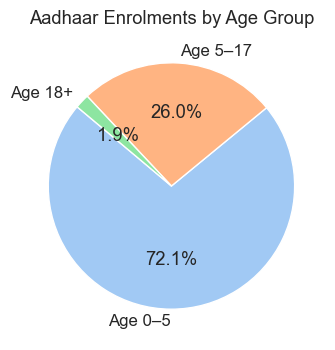

In [51]:
age_totals = df[
    ['age_group_0_to_5', 'age_group_5_to_17', 'age_group_18_plus']
].sum()
plt.figure(figsize=(4,4))
plt.pie(
    age_totals,
    labels=['Age 0–5', 'Age 5–17', 'Age 18+'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#A1C9F4', '#FFB482', '#8DE5A1']
)

plt.title("Aadhaar Enrolments by Age Group")
plt.show()

#### Age-wise Enrolment Comparison by District

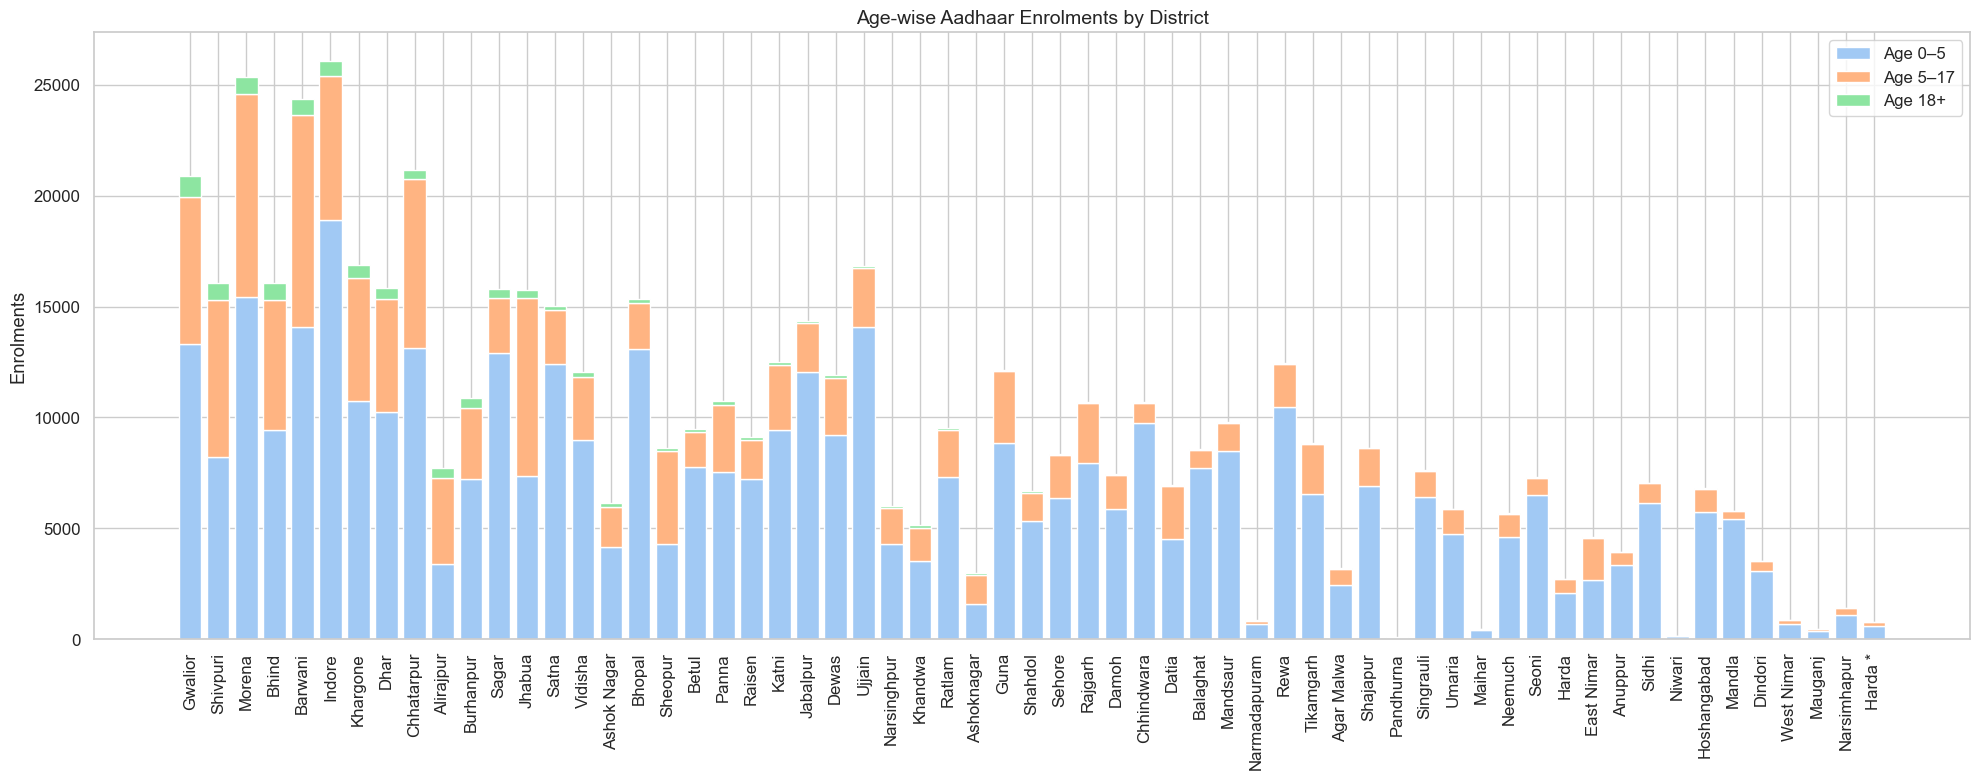

In [40]:
district_age = df.groupby(
    'district', as_index=False
).agg({
    'age_group_0_to_5': 'sum',
    'age_group_5_to_17': 'sum',
    'age_group_18_plus': 'sum'
})

district_age = district_age.sort_values(
    'age_group_18_plus', ascending=False
)
plt.figure(figsize=(20,8))

plt.bar(
    district_age['district'],
    district_age['age_group_0_to_5'],
    label='Age 0–5',
    color='#A1C9F4'
)

plt.bar(
    district_age['district'],
    district_age['age_group_5_to_17'],
    bottom=district_age['age_group_0_to_5'],
    label='Age 5–17',
    color='#FFB482'
)

plt.bar(
    district_age['district'],
    district_age['age_group_18_plus'],
    bottom=(
        district_age['age_group_0_to_5'] +
        district_age['age_group_5_to_17']
    ),
    label='Age 18+',
    color='#8DE5A1'
)

plt.xticks(rotation=90)
plt.legend()
plt.title("Age-wise Aadhaar Enrolments by District", fontsize=14)
plt.ylabel("Enrolments")
plt.tight_layout()
plt.show()

#### Time Trend of Aadhaar Enrolments

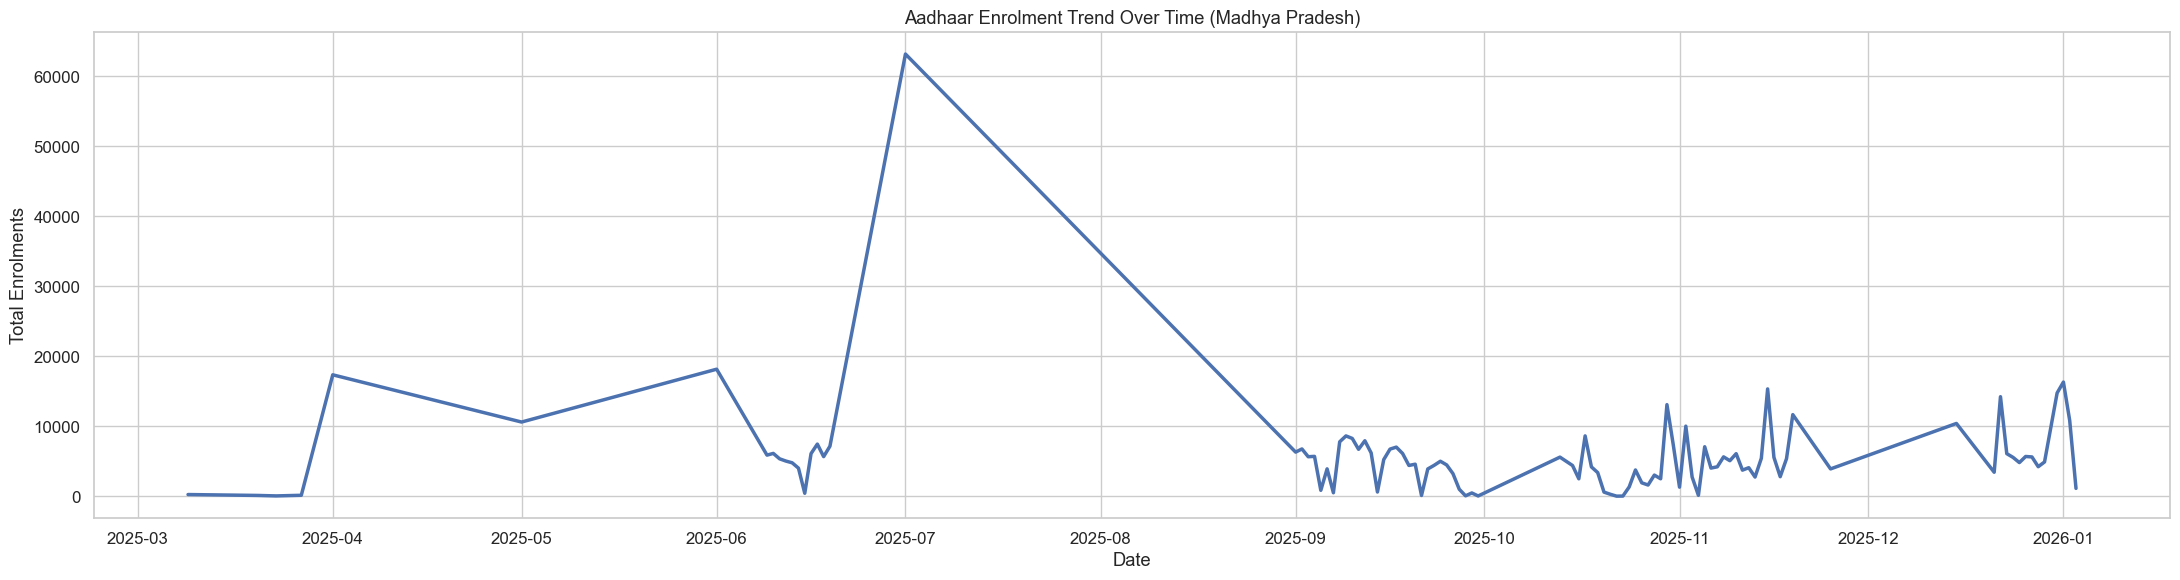

In [41]:
time_trend = df.groupby(
    'date', as_index=False
)['total_enrolments'].sum()
plt.figure(figsize=(22,6))
sns.lineplot(
    data=time_trend,
    x='date',
    y='total_enrolments',
    linewidth=2.5,
    color='#4C72B0'
)

plt.title("Aadhaar Enrolment Trend Over Time (Madhya Pradesh)")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()

#### Heatmap : District vs Age Group

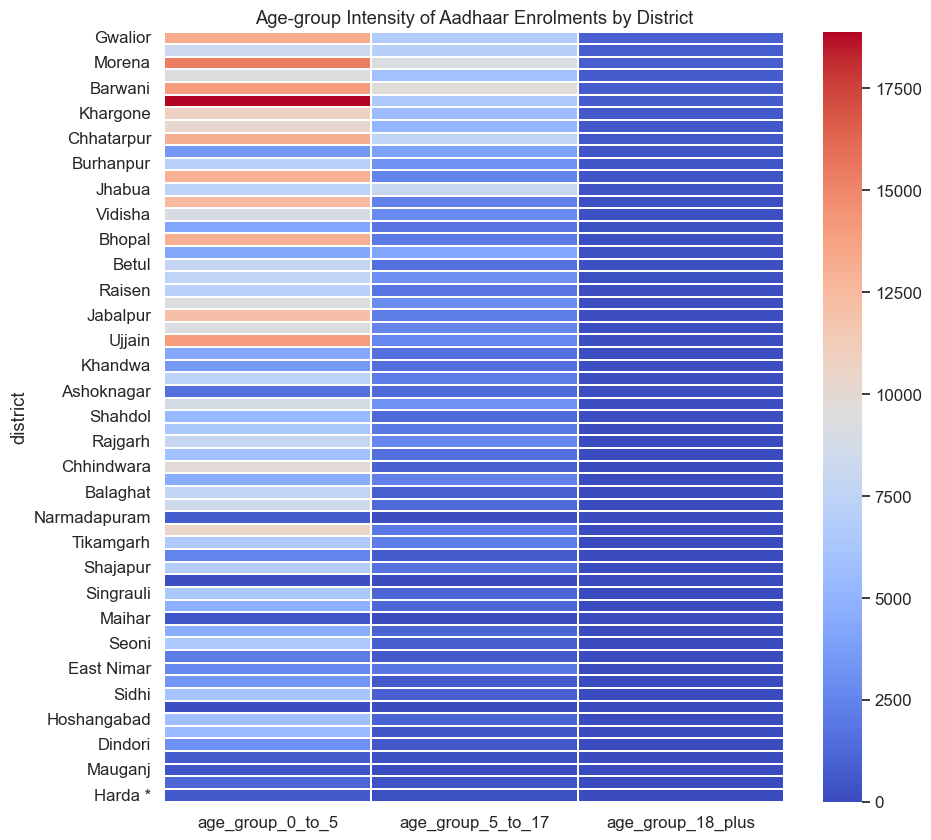

In [52]:
heatmap_data = district_age.set_index('district')
plt.figure(figsize=(10, 10))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    linewidths=0.3
)

plt.title("Age-group Intensity of Aadhaar Enrolments by District")
plt.show()

#### Interactive District-wise Enrolments

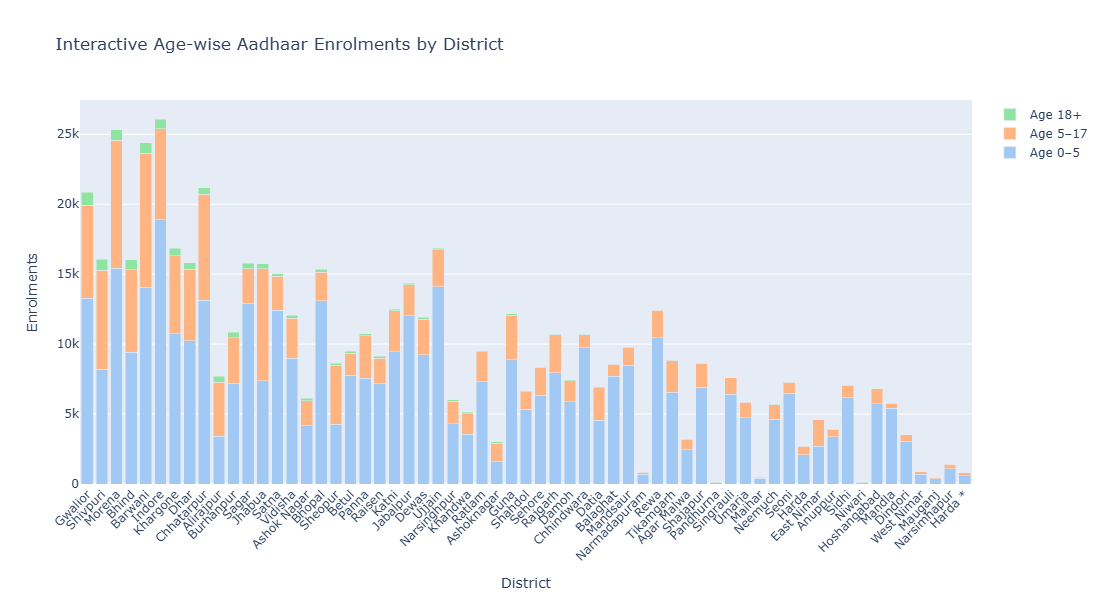

In [43]:
fig = go.Figure()

fig.add_bar(
    x=district_age['district'],
    y=district_age['age_group_0_to_5'],
    name='Age 0–5',
    marker_color='#A1C9F4'
)

fig.add_bar(
    x=district_age['district'],
    y=district_age['age_group_5_to_17'],
    name='Age 5–17',
    marker_color='#FFB482'
)

fig.add_bar(
    x=district_age['district'],
    y=district_age['age_group_18_plus'],
    name='Age 18+',
    marker_color='#8DE5A1'
)

fig.update_layout(
    barmode='stack',
    title="Interactive Age-wise Aadhaar Enrolments by District",
    xaxis_title="District",
    yaxis_title="Enrolments",
    xaxis_tickangle=-45,
    height=600
)

fig.show()

#### District-level Anomaly Detection

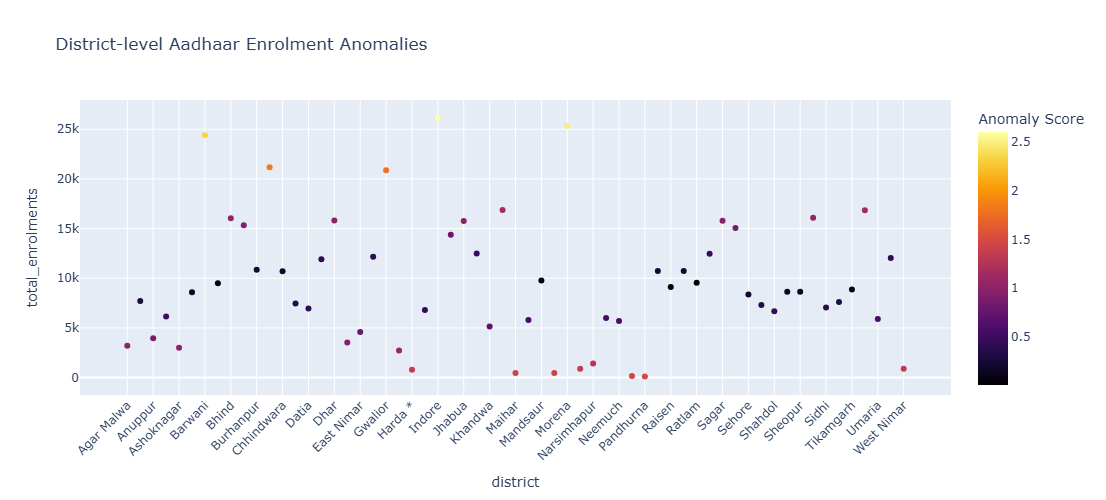

In [44]:
district_df['z_score'] = (
    (district_df['total_enrolments'] - district_df['total_enrolments'].mean()) /
    district_df['total_enrolments'].std()
)
fig = px.scatter(
    district_df,
    x='district',
    y='total_enrolments',
    color=district_df['z_score'].abs(),
    color_continuous_scale='Inferno',
    title="District-level Aadhaar Enrolment Anomalies",
    labels={'color': 'Anomaly Score'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=500
)

fig.show()

## UNIVARIATE ANALYSIS

#### Distribution of Aadhaar Enrolments Across Districts

In [53]:
district_df['total_enrolments'].describe()

count       61.000000
mean      9496.606557
std       6370.302390
min        108.000000
25%       5691.000000
50%       8639.000000
75%      12500.000000
max      26076.000000
Name: total_enrolments, dtype: float64

#### Shape of Enrolment Distribution

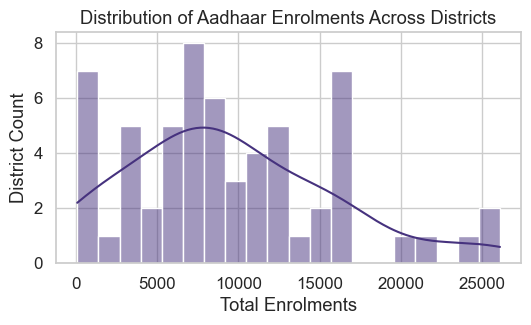

In [55]:
plt.figure(figsize=(6,3))
sns.histplot(
    district_df['total_enrolments'],
    bins=20,
    kde=True
)
plt.title("Distribution of Aadhaar Enrolments Across Districts")
plt.xlabel("Total Enrolments")
plt.ylabel("District Count")
plt.show()

## BIVARIATE ANALYSIS

#### District vs Total Enrolments

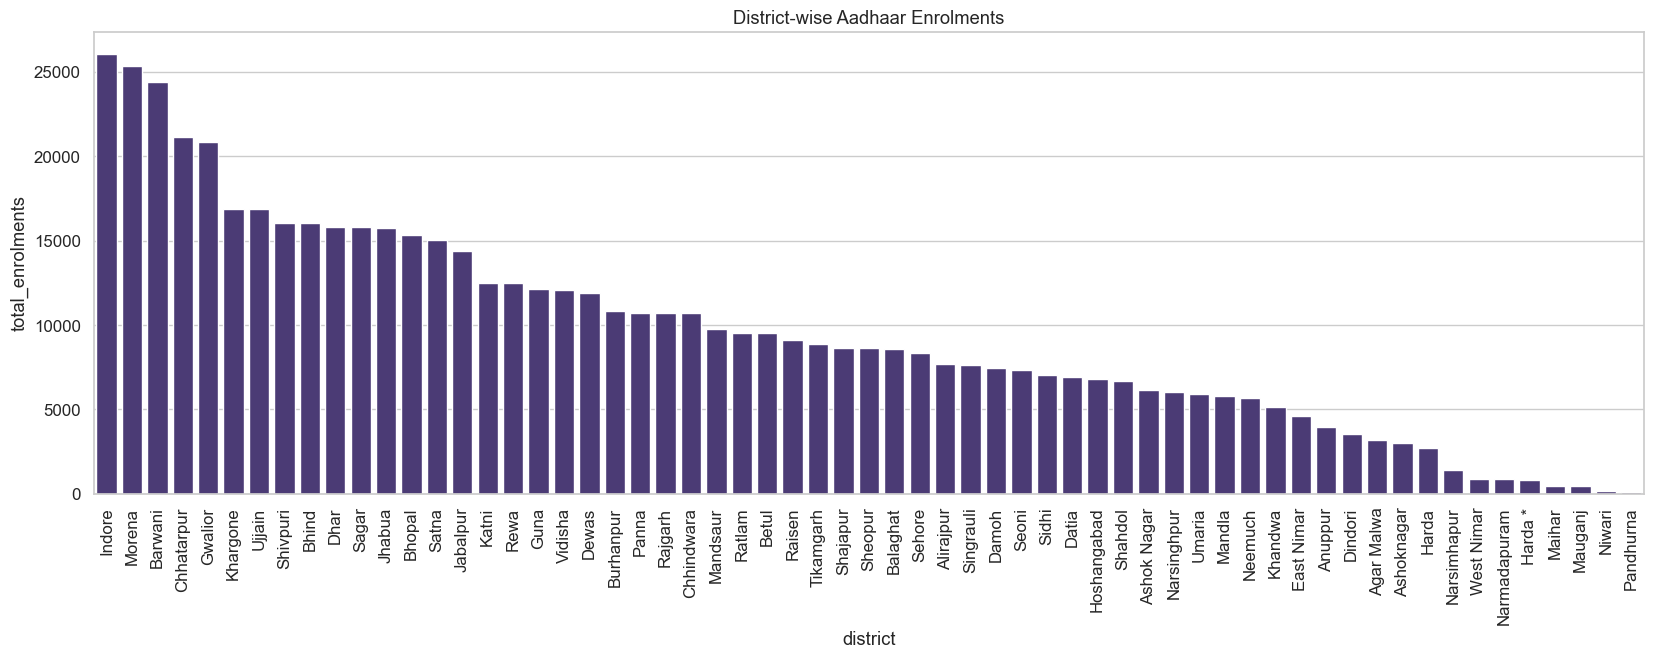

In [58]:
district_sorted = district_df.sort_values(
    'total_enrolments', ascending=False
)
plt.figure(figsize=(20,6))
sns.barplot(
    data=district_sorted,
    x='district',
    y='total_enrolments'
)
plt.xticks(rotation=90)
plt.title("District-wise Aadhaar Enrolments")
plt.show()

#### Time vs Total Enrolments

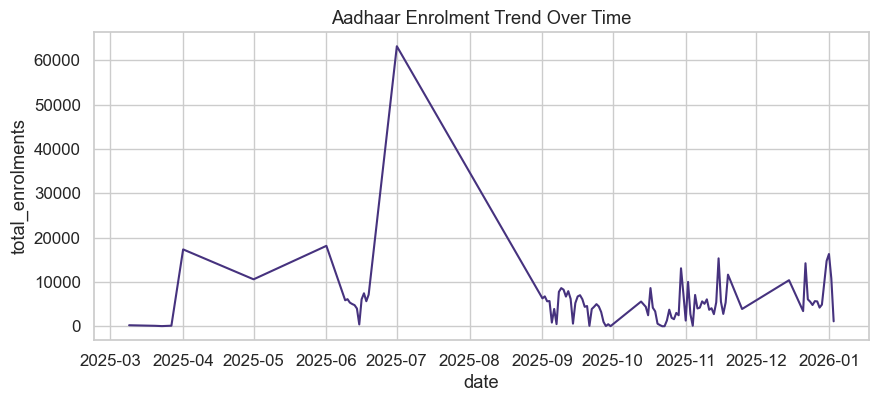

In [59]:
time_trend = df.groupby(
    'date', as_index=False
)['total_enrolments'].sum()
plt.figure(figsize=(10,4))
sns.lineplot(
    data=time_trend,
    x='date',
    y='total_enrolments'
)
plt.title("Aadhaar Enrolment Trend Over Time")
plt.show()

## TRIVARIATE ANALYSIS

#### District × Age Group × Enrolments

In [62]:
district_age = df.groupby(
    'district', as_index=False
).agg({
    'age_group_0_to_5': 'sum',
    'age_group_5_to_17': 'sum',
    'age_group_18_plus': 'sum'
})

In [63]:
## Convert to proportions
district_age['total'] = (
    district_age['age_group_0_to_5'] +
    district_age['age_group_5_to_17'] +
    district_age['age_group_18_plus']
)

district_age['adult_ratio'] = (
    district_age['age_group_18_plus'] / district_age['total']
)

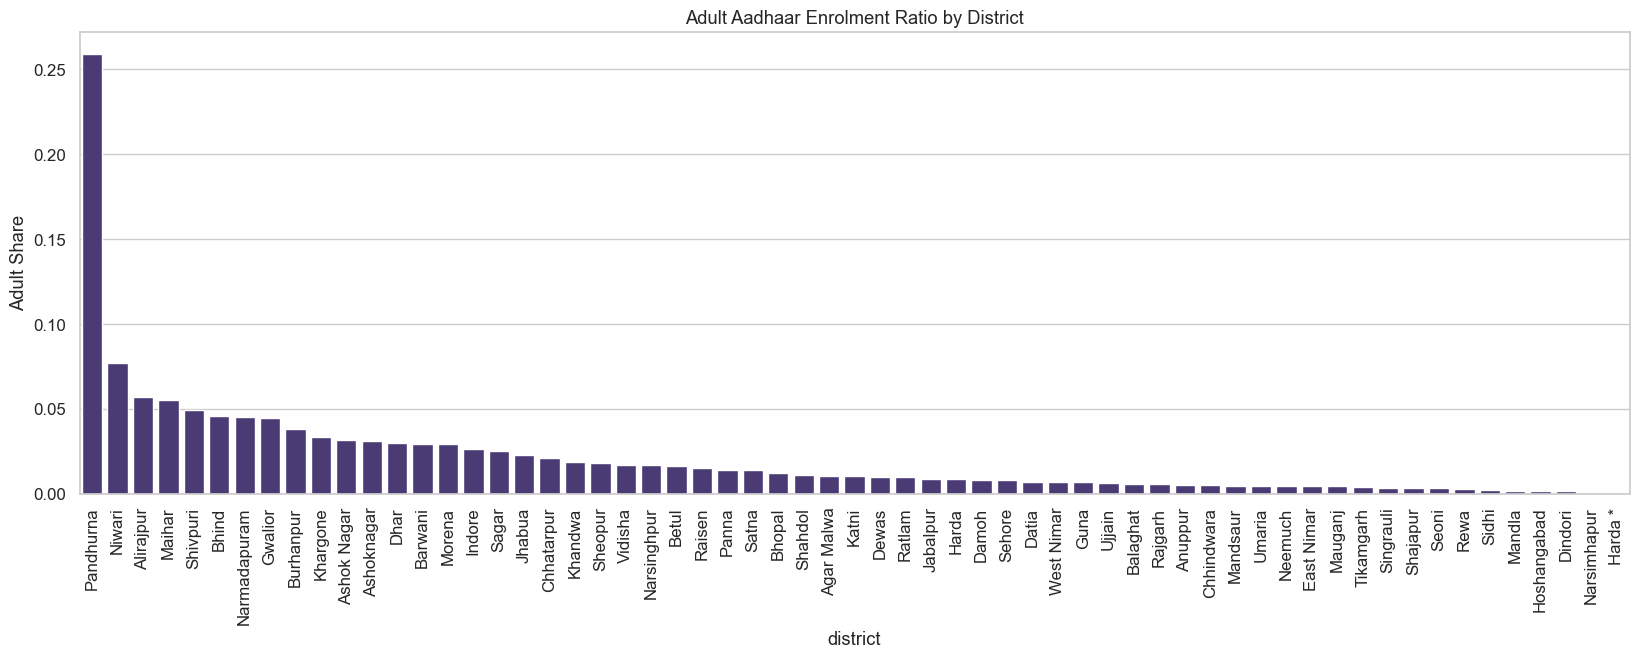

In [65]:
## Visulaizaion 
plt.figure(figsize=(20,6))
sns.barplot(
    data=district_age.sort_values('adult_ratio', ascending=False),
    x='district',
    y='adult_ratio'
)
plt.xticks(rotation=90)
plt.title("Adult Aadhaar Enrolment Ratio by District")
plt.ylabel("Adult Share")
plt.show()

#### District × Time × Enrolments

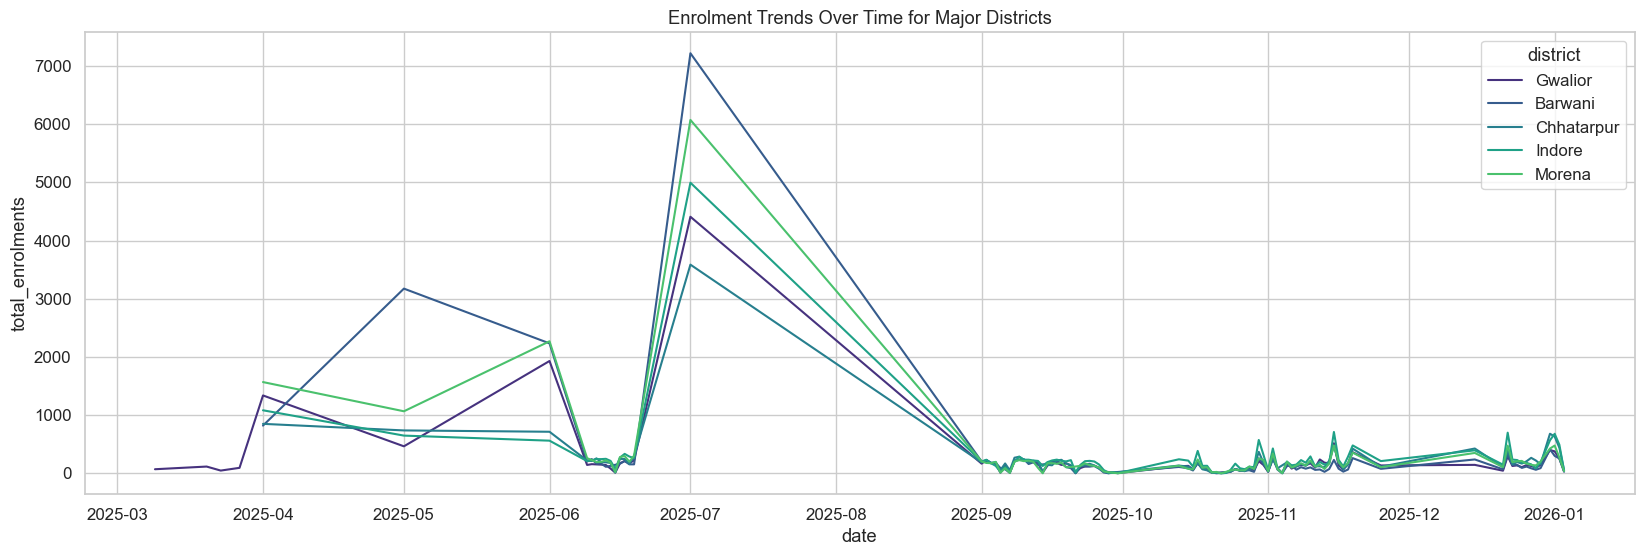

In [68]:
top_districts = district_sorted.head(5)['district']

trend_top = df[
    df['district'].isin(top_districts)
].groupby(
    ['date', 'district'], as_index=False
)['total_enrolments'].sum()

plt.figure(figsize=(20,6))

sns.lineplot(
    data=trend_top,
    x='date',
    y='total_enrolments',
    hue='district'
)
plt.title("Enrolment Trends Over Time for Major Districts")
plt.show()